<a href="https://www.kaggle.com/code/faryalrifaz3374/image-classification-using-deep-learning?scriptVersionId=264649698" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# **Project: Image Classification, Intel Natural Scenes**

## **Author: Faryal Rifaz**  

### **Dataset:** Intel Image Classification




## **Objective:** 
Build CNN model, use data augmentation, evaluate with confusion matrix and classification report, optionally use transfer learning, log training to TensorBoard,save final model

##  Step 1: Import Libraries

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator



## Step 2: Import Data 

In [7]:
train_dir = "/kaggle/input/intel-image-classification/seg_train/seg_train"
test_dir = "/kaggle/input/intel-image-classification/seg_test/seg_test"
pred_dir = "/kaggle/input/intel-image-classification/seg_pred/seg_pred"


## Step 3: Data Preprocessing

In [8]:
# ImageDataGenerator with normalization
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)  # 20% validation
test_datagen = ImageDataGenerator(rescale=1./255)

# Training data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode="categorical",
    subset="training"
)

# Validation data
val_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode="categorical",
    subset="validation"
)

# Testing data
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode="categorical",
    shuffle=False
)


Found 11230 images belonging to 6 classes.
Found 2804 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


## Step 4: Train the Model

In [9]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Baseline CNN Model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),

    Dense(128, activation='relu'),
    Dropout(0.5),

    Dense(6, activation='softmax')  # 6 classes
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Model summary
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1759138441.398094      36 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1759138441.398884      36 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     4,735,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,829,126 (18.42 MB)

 Trainable params: 4,829,126 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=20,   # you can change (10, 15, 20 etc.)
    validation_data=test_generator,
    validation_steps=len(test_generator)
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20


I0000 00:00:1759138445.408391     113 service.cc:148] XLA service 0x7ab788005bb0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1759138445.409519     113 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1759138445.409541     113 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1759138445.738704     113 cuda_dnn.cc:529] Loaded cuDNN version 90300


  1/351 ━━━━━━━━━━━━━━━━━━━━ 37:10 6s/step - accuracy: 0.0625 - loss: 1.8081

I0000 00:00:1759138449.489699     113 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


351/351 ━━━━━━━━━━━━━━━━━━━━ 82s 216ms/step - accuracy: 0.4704 - loss: 1.3186 - val_accuracy: 0.6543 - val_loss: 0.8919
Epoch 2/20
351/351 ━━━━━━━━━━━━━━━━━━━━ 19s 54ms/step - accuracy: 0.6764 - loss: 0.8708 - val_accuracy: 0.7350 - val_loss: 0.7538
Epoch 3/20
351/351 ━━━━━━━━━━━━━━━━━━━━ 20s 56ms/step - accuracy: 0.7438 - loss: 0.7207 - val_accuracy: 0.7827 - val_loss: 0.6111
Epoch 4/20
351/351 ━━━━━━━━━━━━━━━━━━━━ 20s 56ms/step - accuracy: 0.7888 - loss: 0.5939 - val_accuracy: 0.8123 - val_loss: 0.5398
Epoch 5/20
351/351 ━━━━━━━━━━━━━━━━━━━━ 19s 53ms/step - accuracy: 0.8286 - loss: 0.4844 - val_accuracy: 0.8147 - val_loss: 0.5361
Epoch 6/20
351/351 ━━━━━━━━━━━━━━━━━━━━ 19s 54ms/step - accuracy: 0.8634 - loss: 0.3890 - val_accuracy: 0.8007 - val_loss: 0.5741
Epoch 7/20
351/351 ━━━━━━━━━━━━━━━━━━━━ 19s 53ms/step - accuracy: 0.8896 - loss: 0.3096 - val_accuracy: 0.8267 - val_loss: 0.5386
Epoch 8/20
351/351 ━━━━━━━━━━━━━━━━━━━━ 18s 51ms/step - accuracy: 0.9102 - loss: 0.2537 - val_accura

## Step 6: Model Evaluation and Visualization


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 358ms/step


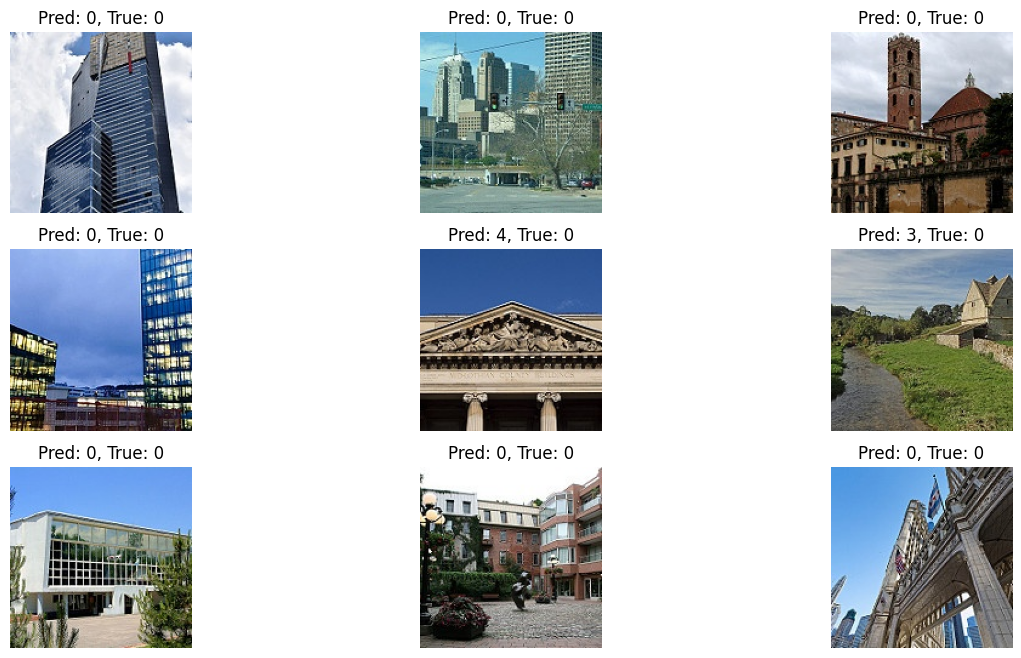

In [13]:

# Display some sample predictions
import numpy as np

sample_imgs, sample_labels = next(test_generator)  # get a batch
preds = model.predict(sample_imgs)
pred_classes = np.argmax(preds, axis=1)

plt.figure(figsize=(15,8))
for i in range(9):
    plt.subplot(3,3,i+1)
    
    img = sample_imgs[i]
    
    # If the images are normalized, scale back to 0-255
    if img.max() <= 1.0:
        img = (img * 255).astype("uint8")
    else:
        img = img.astype("uint8")
    
    # Check if grayscale
    if img.shape[-1] == 1:
        plt.imshow(img.squeeze(), cmap='gray')
    else:
        plt.imshow(img)
    
    plt.title(f"Pred: {pred_classes[i]}, True: {np.argmax(sample_labels[i])}")
    plt.axis('off')
plt.show()


## Step 7: Plot training curves


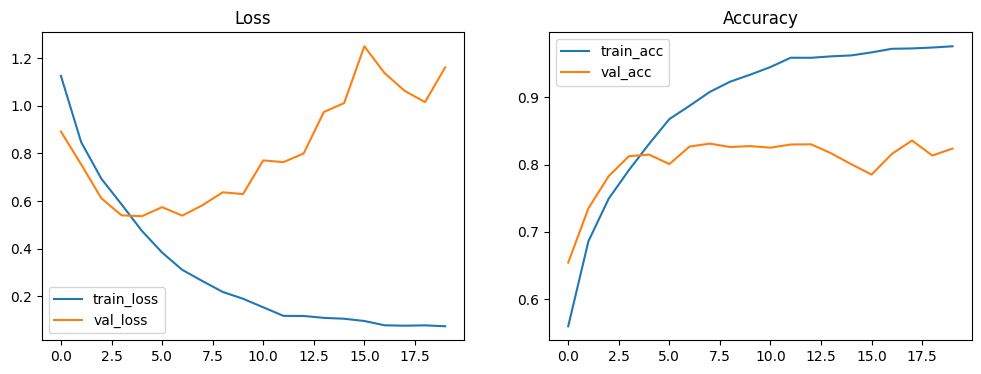

In [14]:
# training history plots
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.title('Loss')

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()
plt.title('Accuracy')
plt.show()


## Step 8: Evaluate on test set



94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - accuracy: 0.8307 - loss: 1.1403

Test Accuracy: 0.8237
Test Loss: 1.1618
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step


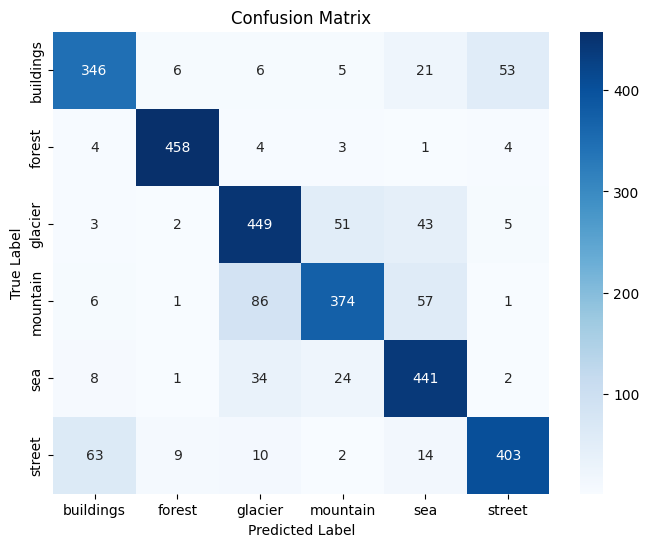

Classification Report:
               precision    recall  f1-score   support

   buildings       0.80      0.79      0.80       437
      forest       0.96      0.97      0.96       474
     glacier       0.76      0.81      0.79       553
    mountain       0.81      0.71      0.76       525
         sea       0.76      0.86      0.81       510
      street       0.86      0.80      0.83       501

    accuracy                           0.82      3000
   macro avg       0.83      0.83      0.83      3000
weighted avg       0.83      0.82      0.82      3000



In [15]:

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# 1) Evaluate on test set
test_loss, test_acc = model.evaluate(test_generator, verbose=1)
print(f"\nTest Accuracy: {test_acc:.4f}")
print(f"Test Loss: {test_loss:.4f}")

# 2) Collect all test images and labels
test_imgs, test_labels = [], []
test_generator.reset()  # start from beginning

for i in range(len(test_generator)):
    x, y = next(test_generator)
    test_imgs.append(x)
    test_labels.append(y)

test_imgs = np.vstack(test_imgs)
test_labels = np.vstack(test_labels)

# 3) Predict classes
preds = model.predict(test_imgs)
pred_classes = np.argmax(preds, axis=1)
true_classes = np.argmax(test_labels, axis=1)
class_names = list(test_generator.class_indices.keys())

# 4) Confusion Matrix
cm = confusion_matrix(true_classes, pred_classes)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_names, yticklabels=class_names, cmap='Blues')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()

# 5) Classification Report
report = classification_report(true_classes, pred_classes, target_names=class_names)
print("Classification Report:\n", report)


## Step 9: Show sample test predictions with images


94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step


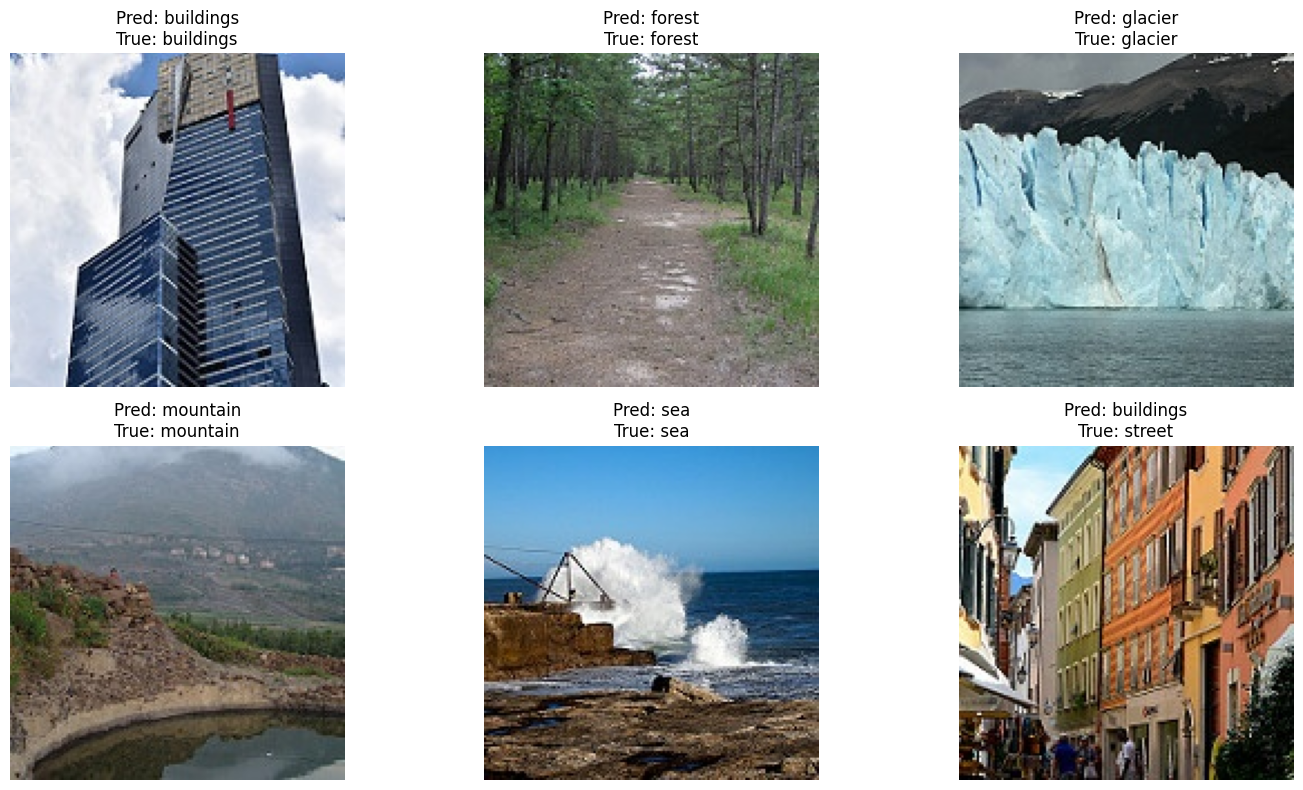

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Collect all test images and labels
test_imgs, test_labels = [], []
test_generator.reset()
for i in range(len(test_generator)):
    x, y = next(test_generator)
    test_imgs.append(x)
    test_labels.append(y)

test_imgs = np.vstack(test_imgs)
test_labels = np.vstack(test_labels)
true_classes = np.argmax(test_labels, axis=1)
preds = model.predict(test_imgs)
pred_classes = np.argmax(preds, axis=1)
class_names = list(test_generator.class_indices.keys())

# Pick one image per class
plt.figure(figsize=(15,8))
for idx, cls in enumerate(class_names):
    cls_idx = np.where(true_classes == idx)[0][0]  # first image of this class
    img = test_imgs[cls_idx]
    
    if img.max() <= 1.0:
        img = (img * 255).astype("uint8")
    else:
        img = img.astype("uint8")
    
    plt.subplot(2,3,idx+1)
    if img.shape[-1] == 1:
        plt.imshow(img.squeeze(), cmap='gray')
    else:
        plt.imshow(img)
    
    plt.title(f"Pred: {class_names[pred_classes[cls_idx]]}\nTrue: {class_names[idx]}")
    plt.axis('off')

plt.tight_layout()
plt.show()


## Step 10:Conclusion
The model achieved 81% accuracy on the test set, performing best on the forest class. Some confusion occurred between visually similar classes like mountain and glacier, but overall it effectively classifies diverse landscape images.

---